In [6]:
from icego import *
import os
import boto3
import pandas as pd
import openai
from dotenv import load_dotenv
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
# Need a .env file containing your API key to call from OpenAI
#env_path = r'.env'


Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.


## Set up the data

In [134]:
training = pd.read_csv(r"research_data\training(1).tsv", sep="\t", index_col=0)
validation = pd.read_csv(r"research_data\validation(2).tsv", sep="\t", index_col=0)
testing = pd.read_csv(r"research_data\testing(3).tsv", sep="\t", index_col=0)

# Train-test split
X_train = training["question"]
y_train = training["label"]

X_val = validation["question"]
y_val = validation["label"]

X_test = testing["question"]
y_test = testing["label"]

## Set up the model

In [ ]:
model = InContextOptimizer(env_path, X_train, y_train, 
                           engine = "text-ada-001", 
                           size = 32,
                           n_examples = 8, 
                           max_tokens = 1,
                           mutation_rate = 0.1)
model.train(pd.Series(X_val), pd.Series(y_val), epochs = 40, n_mutate_examples = 3)

C:\Users\salba\Documents\Capstone\org-assist\icego\incontext_optimizer.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(self.population.to_df(0), ignore_index = True)


Epoch 1: Producing next generation...
Updating New Candidate Fitness


In [4]:
model.save_pickle(r"C:\Users\salba\Documents\Capstone\org-assist\saved_models\mar27.pickle")
model.save_csv(r"C:\Users\salba\Documents\Capstone\org-assist\saved_models\mar27.tsv")

In [54]:
df = pd.read_csv(r"C:\Users\salba\Documents\Capstone\org-assist\saved_models\mar23_2.tsv", sep="\t")

In [5]:
model.df.sort_values(by=["gen","fitness"])

,gen,id,fitness,mutation,context
0,0,0,None,0,"Decide whether the topic of the question is "" ..."
1,0,1,None,0,"Decide whether the topic of the question is "" ..."
2,0,2,None,0,"Decide whether the topic of the question is "" ..."
3,0,3,None,0,"Decide whether the topic of the question is "" ..."
4,0,4,None,0,"Decide whether the topic of the question is "" ..."
...,...,...,...,...,...
1286,40,6,0.692308,0,"Decide whether the topic of the question is "" ..."
1308,40,28,0.730769,0,"Decide whether the topic of the question is "" ..."
1310,40,30,0.769231,0,"Decide whether the topic of the question is "" ..."
1283,40,3,0.846154,0,"Decide whether the topic of the question is "" ..."


In [6]:
model.df.groupby("gen").mean()

C:\Users\salba\AppData\Local\Temp/ipykernel_40760/1769287922.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  model.df.groupby("gen").mean()


,id,fitness,mutation
gen,,,
0,15.5,NaN,0.00000
1,15.5,0.554087,0.12500
2,15.5,0.573317,0.15625
3,15.5,0.576923,0.37500
4,15.5,0.574519,0.50000
5,15.5,0.585337,0.56250
6,15.5,0.582933,0.78125
7,15.5,0.600962,0.68750
8,15.5,0.610577,0.68750


In [7]:
model.df.groupby("gen").max()

,id,fitness,mutation,context
gen,,,,
0,31,NaN,0,"Decide whether the topic of the question is "" ..."
1,31,0.769231,2,"Decide whether the topic of the question is "" ..."
2,31,0.769231,2,"Decide whether the topic of the question is "" ..."
3,31,0.769231,3,"Decide whether the topic of the question is "" ..."
4,31,0.769231,4,"Decide whether the topic of the question is "" ..."
5,31,0.807692,5,"Decide whether the topic of the question is "" ..."
6,31,0.807692,6,"Decide whether the topic of the question is "" ..."
7,31,0.807692,6,"Decide whether the topic of the question is "" ..."
8,31,0.807692,7,"Decide whether the topic of the question is "" ..."


In [59]:
# Validate the model
pred = [model.predict(v) for v in X_test]

In [60]:
results = pd.DataFrame({"pred":pred,"true":y_test})
results['pred'] = results.pred.str.strip()
results

,pred,true
0,Other,Other
1,Other,Other
2,Other,Data
3,Data,Data
4,Other,Other
5,Other,Other
6,Data,Data
7,Data,Data
8,Data,Data
9,Data,Other


In [61]:
accuracy_score(results.pred, results.true)

0.65

In [62]:
confusion_matrix(results.pred, results.true)

array([[7, 4],
       [3, 6]], dtype=int64)

In [10]:
# Validate the model
pred = [model.predict(v) for v in X_test]
results = pd.DataFrame({"pred":pred,"true":y_test})
results['pred'] = results.pred.str.strip()
results

,pred,true
0,Other,Other
1,Other,Other
2,Other,Data
3,Data,Data
4,Other,Other
5,Other,Other
6,Data,Data
7,Data,Data
8,Data,Data
9,Data,Other


In [11]:
accuracy_score(results.pred, results.true)

0.7

In [8]:
# Validate the model
pred = [model.predict(v) for v in X_test]
results = pd.DataFrame({"pred":pred,"true":y_test})
results['pred'] = results.pred.str.strip()
results

,pred,true
0,Other,Other
1,Other,Other
2,Other,Data
3,Other,Data
4,Other,Other
5,Other,Other
6,Data,Data
7,Other,Data
8,Data,Data
9,Data,Other


In [9]:
accuracy_score(results.pred, results.true)

0.65

## Plot results for all three models

In [19]:
df1 = pd.read_csv(r"saved_models\mar23_2.tsv", sep="\t")
df2 = pd.read_csv(r"saved_models\mar24.tsv", sep="\t")
df3 = pd.read_csv(r"saved_models\mar27.tsv", sep="\t")

#model1 = InContextOptimizer.load_pickle(env_path, r"C:\Users\salba\Documents\Capstone\org-assist\saved_models\mar23_2.pickle")


C:\Users\salba\AppData\Local\Temp\ipykernel_14816\2471108071.py:14: UserWarning: The label '_nolegend_' of <matplotlib.collections.PolyCollection object at 0x000001DC8ACC57C0> starts with '_'. It is thus excluded from the legend.
  plt.legend(title = "Trial", labels = [1,'_nolegend_', 2, '_nolegend_', 3, '_nolegend_', "Random Guess"]);
C:\Users\salba\AppData\Local\Temp\ipykernel_14816\2471108071.py:14: UserWarning: The label '_nolegend_' of <matplotlib.collections.PolyCollection object at 0x000001DC8ACC5D90> starts with '_'. It is thus excluded from the legend.
  plt.legend(title = "Trial", labels = [1,'_nolegend_', 2, '_nolegend_', 3, '_nolegend_', "Random Guess"]);
C:\Users\salba\AppData\Local\Temp\ipykernel_14816\2471108071.py:14: UserWarning: The label '_nolegend_' of <matplotlib.collections.PolyCollection object at 0x000001DC8ACD23A0> starts with '_'. It is thus excluded from the legend.
  plt.legend(title = "Trial", labels = [1,'_nolegend_', 2, '_nolegend_', 3, '_nolegend_', "Ran

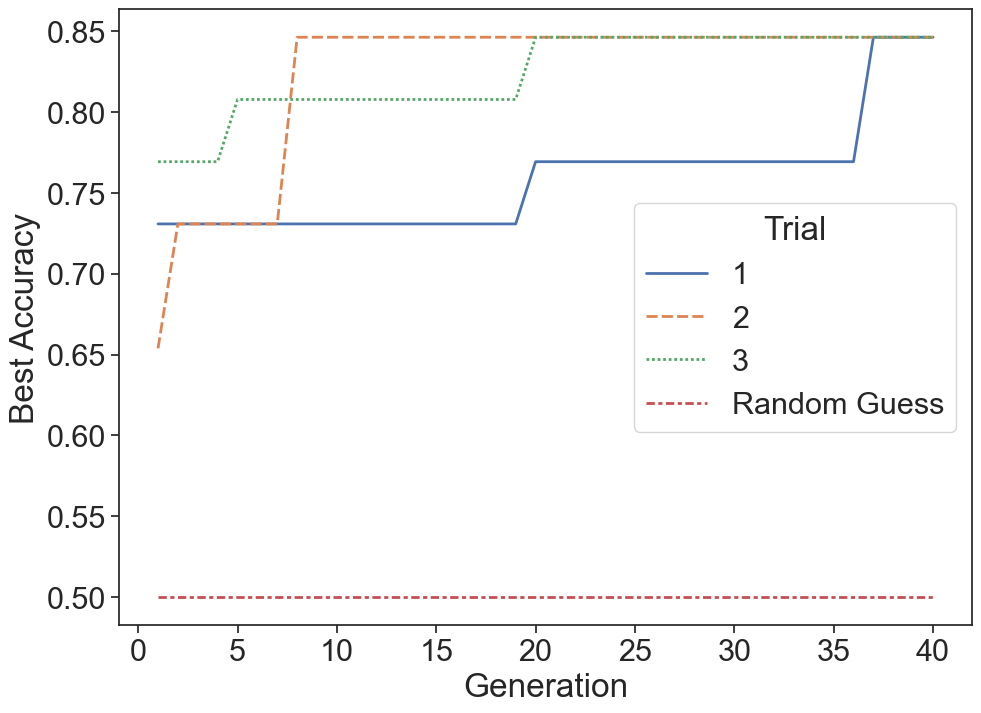

In [20]:
sns.set(font_scale = 2, style="white", rc={'figure.figsize':(11,8)})
best = pd.DataFrame({1: df1.groupby("gen").max().fitness, 
                     2: df2.groupby("gen").max().fitness, 
                     3: df3.groupby("gen").max().fitness, 
                     4: [np.NaN] + ([0.5]*40)
                     #5: [np.NaN] + [df1.groupby("gen").max().fitness[1]]*40,
                     #6: [np.NaN] + [df2.groupby("gen").max().fitness[1]]*40,
                     #7: [np.NaN] + [df3.groupby("gen").max().fitness[1]]*40,
                    })

p = sns.lineplot(data=best, linewidth=2);
p.set_ylabel("Best Accuracy");
p.set_xlabel("Generation");
plt.legend(title = "Trial", labels = [1,'_nolegend_', 2, '_nolegend_', 3, '_nolegend_', "Random Guess"]);
plt.tick_params(bottom=True, left=True)
plt.savefig('genetic-small.png', dpi=300)

In [150]:
[df1.groupby("gen").max().fitness[1]]

[0.7307692307692307]

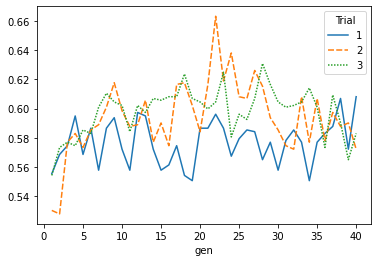

In [38]:
avg = pd.DataFrame({1: df1.groupby("gen").mean().fitness, 2: df2.groupby("gen").mean().fitness, 3: df3.groupby("gen").mean().fitness})
sns.lineplot(data=avg);
p.set_ylabel("Accuracy");
p.set_xlabel("Generation");
plt.legend(title = "Trial");

In [354]:
# Old data format
overall = pd.DataFrame({"avg": best[[1,2,3]].T.mean(), "stderr": best[[1,2,3]].T.std(ddof=1) / np.sqrt(3)})
overall = overall.dropna()
overall["Baseline"] = overall.avg[1]

In [717]:
overall

,avg,stderr,Baseline
gen,,,
1,0.717949,0.033920,0.717949
2,0.743590,0.012821,0.717949
3,0.743590,0.012821,0.717949
4,0.743590,0.012821,0.717949
5,0.756410,0.025641,0.717949
6,0.756410,0.025641,0.717949
7,0.756410,0.025641,0.717949
8,0.794872,0.033920,0.717949
9,0.794872,0.033920,0.717949


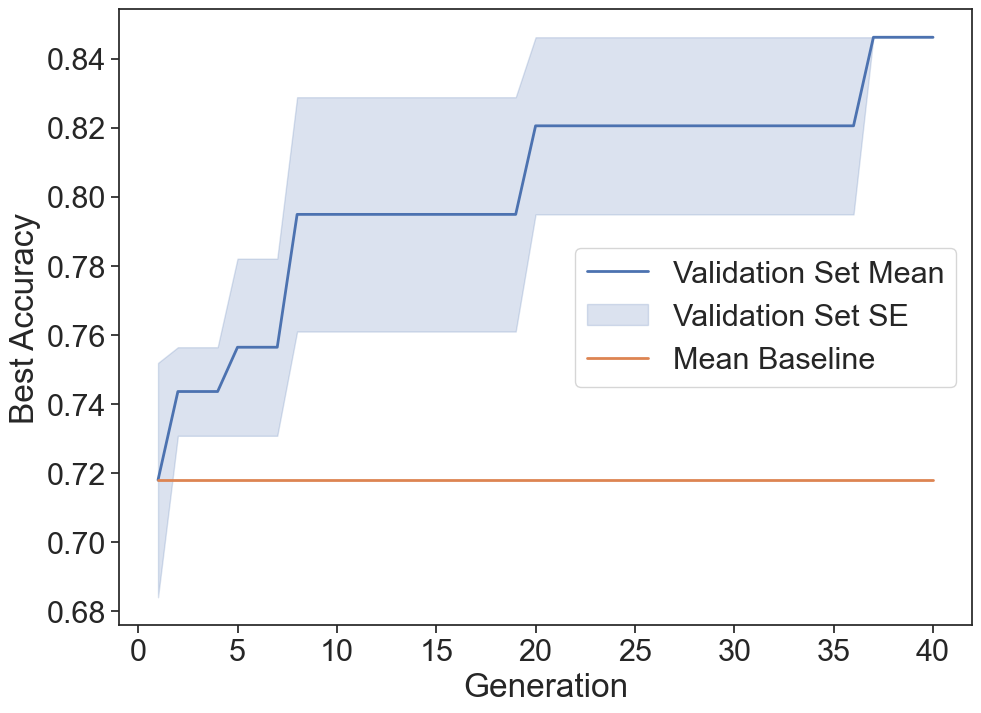

In [490]:
sns.set(font_scale = 2, style="white", rc={'figure.figsize':(11,8)})
fig, ax = plt.subplots()
p = sns.lineplot(data=overall, y="avg",x="gen", linewidth=2, ax=ax);
sns.lineplot(data=overall, y="Baseline",x="gen", linewidth=2, ax=ax);
p.fill_between(overall.index, overall.avg - overall.stderr, overall.avg + overall.stderr, color='b', alpha=0.2);
p.set_ylabel("Best Accuracy");
p.set_xlabel("Generation");
p.legend(['Validation Set Mean', 'Validation Set SE', 'Mean Baseline'], loc="right");
plt.tick_params(bottom=True, left=True)
plt.savefig('genetic2-small.png', dpi=300);

In [93]:
#model1 = InContextOptimizer.load_pickle(env_path, r"C:\Users\salba\Documents\Capstone\org-assist\saved_models\mar23_2.pickle")
data = np.array([0.65, 0.65, 0.7])
data.std()

In [502]:
model1 = InContextOptimizer.load_pickle(env_path, r"saved_models\mar23_2.pickle")
model2 = InContextOptimizer.load_pickle(env_path, r"saved_models\mar24.pickle")
model3 = InContextOptimizer.load_pickle(env_path, r"saved_models\mar27.pickle")

divs = np.array([Population.mean_diversity(model1.population.candidates),
        Population.mean_diversity(model2.population.candidates),
        Population.mean_diversity(model3.population.candidates)]) / 8

In [503]:
np.mean(divs)

0.9401041666666666

In [3]:
# Output final prompts for each model

for j, model in enumerate([model1, model2, model3]):
    print("Model %s"%(j+1))
    best = pd.concat([model.population.best.examples, model.population.best.solutions], axis=1)
    for i in best.index:
        print(best.loc[i, 0] + " [" + best.loc[i,1] + "]")


In [4]:
# Output datasets
titles = ["TRAINING", "VALIDATION", "TESTING"]
for j, dataset in enumerate([training, validation, testing]):
    print(titles[j])
    for i in dataset.index:
        print(dataset.loc[i,"question"] + " [" + dataset.loc[i,"label"] + "]")


## Test Reviewer Agreement

In [7]:
# Testing Label Agreement
train_rev1 = pd.read_csv(r"research_data\training(1).tsv", sep="\t", index_col=0)
val_rev1 = pd.read_csv(r"research_data\validation(2).tsv", sep="\t", index_col=0)
test_rev1 = pd.read_csv(r"research_data\testing(3).tsv", sep="\t", index_col=0)

train_rev2 = pd.read_csv(r"research_data\training_reviewer2.tsv", sep="\t", index_col=0)
val_rev2 = pd.read_csv(r"research_data\validation_reviewer2.tsv", sep="\t", index_col=0)
test_rev2 = pd.read_csv(r"research_data\testing_reviewer2.tsv", sep="\t", index_col=0)

train_rev3 = pd.read_csv(r"research_data\training_reviewer3.tsv", sep="\t", index_col=0)
val_rev3 = pd.read_csv(r"research_data\validation_reviewer3.tsv", sep="\t", index_col=0)
test_rev3 = pd.read_csv(r"research_data\testing_reviewer3.tsv", sep="\t", index_col=0)

train_rev4 = pd.read_csv(r"research_data\training_reviewer4.tsv", sep="\t", index_col=0)
val_rev4 = pd.read_csv(r"research_data\validation_reviewer4.tsv", sep="\t", index_col=0)
test_rev4 = pd.read_csv(r"research_data\testing_reviewer4.tsv", sep="\t", index_col=0)


In [10]:
# Print agreement on training data 
train_agree = train_rev1.merge(train_rev2, how = "inner", on = "question").merge(train_rev3, how = "inner", on = "question").merge(train_rev4, how = "inner", on = "question", suffixes = ['_z','_w'])
# Calculate how many reviewers agreed with the original assessment
train_agree["Agreement"] = (train_agree.label_x == train_agree.label_y).astype(int) + (train_agree.label_x == train_agree.label_z).astype(int) + pd.to_numeric(train_agree.label_x == train_agree.label_w).astype(int) 
for i in train_agree.index:
    print(train_agree.question[i] + " [%s]; [%s, %s, %s]"%(train_agree.label_x[i], train_agree.label_y[i], train_agree.label_z[i], train_agree.label_w[i]))
    
print("\nTotal Agreement", (train_agree.Agreement == 3).mean())
print("2/3 Agreement", (train_agree.Agreement >= 2).mean())
print("1/3 Agreement", (train_agree.Agreement >= 1).mean())
print("No Agreement", (train_agree.Agreement >= 0).mean())
print("Total Accuracy: %s"%(train_agree.Agreement.sum() / (3*train_agree.shape[0])))

In [11]:
# Print agreement on val Set
val_agree = val_rev1.merge(val_rev2, how = "inner", on = "question").merge(val_rev3, how = "inner", on = "question").merge(val_rev4, how = "outer", on = "question", suffixes = ['_z','_w'])
val_agree["Agreement"] = (val_agree.label_x == val_agree.label_y).astype(int) + (val_agree.label_x == val_agree.label_z).astype(int) + pd.to_numeric(val_agree.label_x == val_agree.label_w).astype(int) 
for i in val_agree.index:
    print(val_agree.question[i] + " [%s]; [%s, %s, %s]"%(val_agree.label_x[i], val_agree.label_y[i], val_agree.label_z[i], val_agree.label_w[i]))
    
print("\nTotal Agreement", (val_agree.Agreement == 3).mean())
print("2/3 Agreement", (val_agree.Agreement >= 2).mean())
print("1/3 Agreement", (val_agree.Agreement >= 1).mean())
print("No Agreement", (val_agree.Agreement >= 0).mean())
print("Total Accuracy: %s"%(val_agree.Agreement.sum() / (3*val_agree.shape[0])))

In [12]:
# Print agreement on test set
test_agree = test_rev1.merge(test_rev2, how = "inner", on = "question").merge(test_rev3, how = "inner", on = "question").merge(test_rev4, how = "inner", on = "question", suffixes = ['_z','_w'])
test_agree["Agreement"] = (test_agree.label_x == test_agree.label_y).astype(int) + (test_agree.label_x == test_agree.label_z).astype(int) + pd.to_numeric(test_agree.label_x == test_agree.label_w).astype(int) 

for i in test_agree.index:
    print(test_agree.question[i] + " [%s]; [%s, %s, %s]"%(test_agree.label_x[i], test_agree.label_y[i], test_agree.label_z[i], test_agree.label_w[i]))
       
print("\nTotal Agreement", (test_agree.Agreement == 3).mean())
print("2/3 Agreement", (test_agree.Agreement >= 2).mean())
print("1/3 Agreement", (test_agree.Agreement >= 1).mean())
print("No Agreement", (test_agree.Agreement >= 0).mean())
print("Total Accuracy: %s"%(test_agree.Agreement.sum() / (3*test_agree.shape[0])))

C:\Users\salba\AppData\Local\Temp\ipykernel_16036\877703540.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.idxmax is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cand_best1 = df1.loc[df1.dropna().groupby("gen").idxmax().fitness].context.apply(
C:\Users\salba\AppData\Local\Temp\ipykernel_16036\877703540.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.idxmax is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cand_best2 = df2.loc[df2.dropna().groupby("gen").idxmax().fitness].context.apply(
C:\Users\salba\AppData\Local\Temp\ipykernel_16036\877703540.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.idxmax is deprecated. In a future version, numeric_only will default to False. Eithe

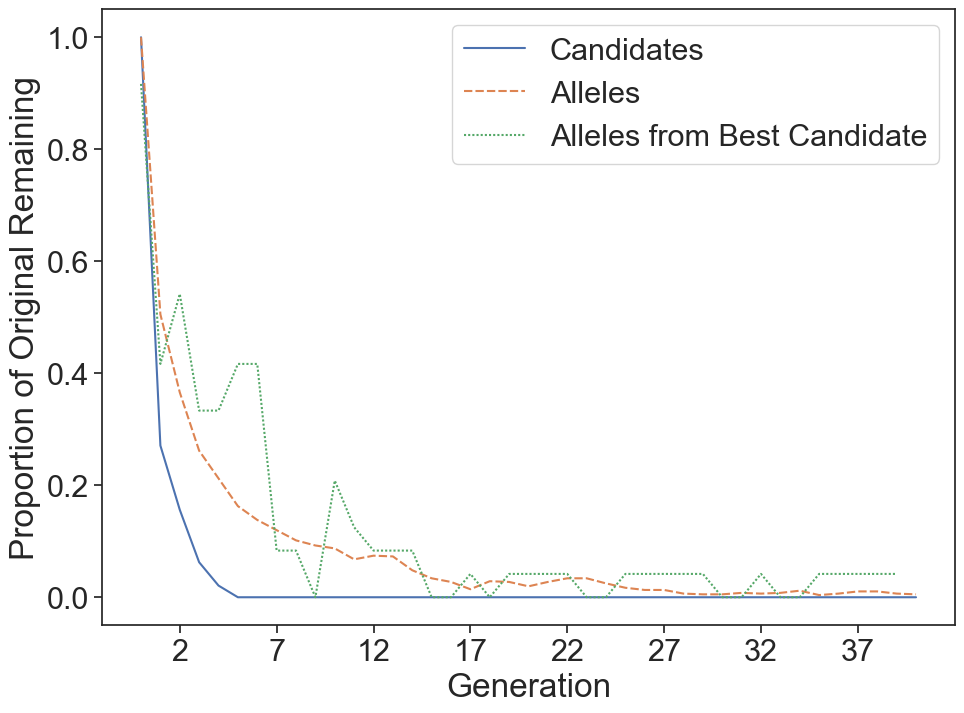

In [747]:
cand_by_gen1 = df1.groupby("gen").context.apply(lambda x: [Candidate(txt[0::2], pd.Series(txt[1::2]).str[7:]) for txt in x.str.split("\n").apply(lambda x: x[1:-1])])
cand_by_gen2 = df2.groupby("gen").context.apply(lambda x: [Candidate(txt[0::2], pd.Series(txt[1::2]).str[7:]) for txt in x.str.split("\n").apply(lambda x: x[1:-1])])
cand_by_gen3 = df3.groupby("gen").context.apply(lambda x: [Candidate(txt[0::2], pd.Series(txt[1::2]).str[7:]) for txt in x.str.split("\n").apply(lambda x: x[1:-1])])



# Total allele population
startqs1 = pd.Series([cand for cand in cand_by_gen1[0] for cand in cand.examples])
pct_same_alleles_pop1 = np.array([sum([any(startqs1 == q) for cand in cand_gen for q in cand.examples]) for cand_gen in cand_by_gen1]) / 256
startqs2 = pd.Series([cand for cand in cand_by_gen2[0] for cand in cand.examples])
pct_same_alleles_pop2 = np.array([sum([any(startqs2 == q) for cand in cand_gen for q in cand.examples]) for cand_gen in cand_by_gen2]) / 256
startqs3 = pd.Series([cand for cand in cand_by_gen3[0] for cand in cand.examples])
pct_same_alleles_pop3 = np.array([sum([any(startqs3 == q) for cand in cand_gen for q in cand.examples]) for cand_gen in cand_by_gen3]) / 256
pct_same_alleles_pop = np.mean([pct_same_alleles_pop1, pct_same_alleles_pop2, pct_same_alleles_pop3], axis=0)

# Only best candidate
cand_best1 = df1.loc[df1.dropna().groupby("gen").idxmax().fitness].context.apply(
    lambda x: Candidate(x.split("\n")[1:-1:2], pd.Series(x.split("\n")[2:-1:2]).str[7:]))
cand_best2 = df2.loc[df2.dropna().groupby("gen").idxmax().fitness].context.apply(
    lambda x: Candidate(x.split("\n")[1:-1:2], pd.Series(x.split("\n")[2:-1:2]).str[7:]))
cand_best3 = df3.loc[df3.dropna().groupby("gen").idxmax().fitness].context.apply(
    lambda x: Candidate(x.split("\n")[1:-1:2], pd.Series(x.split("\n")[2:-1:2]).str[7:]))

pct_alleles_best1 = np.array([sum([any(startqs1 == q) for q in cand.examples]) for cand in cand_best1]) / 8
pct_alleles_best2 = np.array([sum([any(startqs2 == q) for q in cand.examples]) for cand in cand_best2]) / 8
pct_alleles_best3 = np.array([sum([any(startqs3 == q) for q in cand.examples]) for cand in cand_best3]) / 8
pct_alleles_best = np.mean([pct_alleles_best1, pct_alleles_best2, pct_alleles_best3], axis=0)


# Total candidate population
start = [set(cand.examples) for cand in cand_by_gen1[0]]
two = [cand.examples for cand in cand_by_gen1[1]]
pct_same_candidates1 = np.array([sum([any([set(cand.examples) == start_examples for start_examples in start]) for cand in cand_list]) for cand_list in cand_by_gen1]) / 32

start = [set(cand.examples) for cand in cand_by_gen2[0]]
two = [cand.examples for cand in cand_by_gen2[1]]
pct_same_candidates2 = np.array([sum([any([set(cand.examples) == start_examples for start_examples in start]) for cand in cand_list]) for cand_list in cand_by_gen2]) / 32

start = [set(cand.examples) for cand in cand_by_gen3[0]]
two = [cand.examples for cand in cand_by_gen3[1]]
pct_same_candidates3 = np.array([sum([any([set(cand.examples) == start_examples for start_examples in start]) for cand in cand_list]) for cand_list in cand_by_gen3]) / 32

pct_same_candidates = np.mean([pct_same_candidates1, pct_same_candidates2, pct_same_candidates3], axis=0)


p = sns.lineplot([pct_same_candidates, pct_same_alleles_pop, pct_alleles_best]);
p.set_ylabel("Proportion of Original Remaining");
p.set_xlabel("Generation");
plt.legend(labels = ["Candidates", "_nolegend_", "Alleles", "_nolegend_", "Alleles from Best Candidate"]);
plt.tick_params(bottom=True, left=True)
plt.xticks(range(2,40,5))
plt.savefig('replacement.png', dpi=300)